In [3]:
import os
import numpy as np
import pandas as pd
from scipy import optimize
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.model_selection import learning_curve
import matplotlib.pyplot as plt
from tqdm import tqdm
from sklearn.metrics import accuracy_score, confusion_matrix, plot_confusion_matrix
from sklearn.metrics import precision_score, recall_score
from sklearn.preprocessing import OneHotEncoder, LabelBinarizer
# tells matplotlib to embed plots within the notebook
%matplotlib inline

In [4]:
import pickle 

with open('preprocessing/heart/X.pkl', 'rb') as f:
    x = pickle.load(f)
with open('preprocessing/heart/y.pkl', 'rb') as f:
    y = pickle.load(f)

print('So luong du lieu: ', len(x))
print('So luong nhan: ', len(y))

lb = LabelBinarizer()
lb.fit(y)
y = lb.transform(y)
y = y.reshape(1, -1)[0]
y

So luong du lieu:  270
So luong nhan:  270


array([1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0,
       1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1,
       0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0,
       0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0,
       1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1,
       0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1,
       1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0,
       0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0,
       0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0,
       1, 0, 0, 0, 0, 1])

In [5]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.15, stratify=y, random_state=10)

In [6]:
x_train

,Age,BP,Cholesterol,Max HR,ST depression,Sex_0,Sex_1,Chest pain type_1,Chest pain type_2,Chest pain type_3,...,Slope of ST_1,Slope of ST_2,Slope of ST_3,Number of vessels fluro_0,Number of vessels fluro_1,Number of vessels fluro_2,Number of vessels fluro_3,Thallium_3,Thallium_6,Thallium_7
171,1.602109,0.485490,0.084138,-0.159054,0.831083,0,1,0,0,1,...,0,1,0,0,0,0,1,0,0,1
13,0.722232,0.148950,-0.303530,-0.202302,1.355977,0,1,1,0,0,...,0,1,0,0,0,1,0,1,0,0
129,0.612248,-0.804579,-0.381064,0.446409,0.306188,0,1,0,0,0,...,1,0,0,0,0,1,0,0,0,1
81,-2.137367,-0.636310,-1.001334,-0.851013,0.481153,0,1,0,0,0,...,0,1,0,1,0,0,0,0,0,1
85,-1.367475,0.934210,-0.109696,1.224862,-0.218706,0,1,1,0,0,...,1,0,0,0,0,1,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
91,0.722232,-0.075410,1.557280,0.835636,-0.918565,1,0,0,0,0,...,1,0,0,1,0,0,0,1,0,0
235,0.832217,1.607289,-1.660371,-0.202302,4.505343,1,0,0,0,0,...,0,0,1,0,0,0,1,0,0,1
76,-1.037521,-1.533749,-0.807500,-0.072560,1.705907,0,1,0,0,0,...,0,1,0,1,0,0,0,1,0,0
63,0.612248,1.046389,-0.187230,0.922131,-0.131224,1,0,1,0,0,...,1,0,0,1,0,0,0,1,0,0


In [7]:
accuracies = {}

lr = LogisticRegression()
lr.fit(x_train, y_train)
acc = lr.score(x_test, y_test)*100

accuracies['Logistic Regression'] = acc
print("Test Accuracy {:.2f}%".format(acc))

Test Accuracy 85.37%


C:\Users\dovan\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


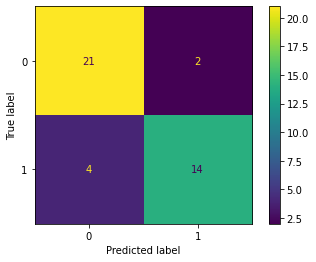

In [8]:
# Hiển thị confusion matrix
plot_confusion_matrix(lr, x_test, y_test)

In [9]:
from sklearn.metrics import precision_score, recall_score
recall_s = recall_score(y_test, lr.predict(x_test), average=None)
print('Tỉ lệ dự đoán đúng người bị bệnh là ', recall_s[1])
print('Tỉ lệ dự đoán đúng người không bị bệnh là', recall_s[0])

Tỉ lệ dự đoán đúng người bị bệnh là  0.7777777777777778
Tỉ lệ dự đoán đúng người không bị bệnh là 0.9130434782608695


In [11]:
def sigmoid(z):

    z = np.array(z)
    
    g = np.zeros(z.shape)

    import math
    g = 1 / (1 + math.e**(-z))
    
    return g

## 1 Logistic Regression

In [12]:
# Setup the data matrix appropriately, and add ones for the intercept term
m, n = x_train.shape

# Add intercept term to X
x_train = np.concatenate([np.ones((m, 1)), x_train], axis=1)
x_train
# y_train

array([[ 1.        ,  1.60210896,  0.48548982, ...,  0.        ,
         0.        ,  1.        ],
       [ 1.        ,  0.72223219,  0.14895002, ...,  1.        ,
         0.        ,  0.        ],
       [ 1.        ,  0.61224759, -0.80457941, ...,  0.        ,
         0.        ,  1.        ],
       ...,
       [ 1.        , -1.03752137, -1.53374897, ...,  1.        ,
         0.        ,  0.        ],
       [ 1.        ,  0.61224759,  1.04638949, ...,  1.        ,
         0.        ,  0.        ],
       [ 1.        ,  1.16217058,  0.37330989, ...,  1.        ,
         0.        ,  0.        ]])

In [13]:
def costFunction(theta, X, y):

    # Initialize some useful values
    m = y.size  # number of training examples

    J = 0
    grad = np.zeros(theta.shape)

    
    ytp = np.transpose(y)
    ttp = np.transpose(theta)
    uni = (np.ones(y.shape))
#     print((ytp * np.log(sigmoid(X * theta))))
#     print(np.dot( X, theta))
#     print(y)
    m = np.size(X,0)
    n = np.size(X,1)
#     J = -1/m *  (y * np.log(sigmoid(np.dot( X, theta) + np.subtract(uni, y) * np.log(np.subtract(uni, sigmoid(np.dot( X, theta)))))))
    
    for i in range(m):
        J += -1/m *  (y[i] * np.log(sigmoid(np.dot(ttp,X[i]))) + (1-y[i]) * np.log(1 - sigmoid(np.dot( ttp, X[i]))))
       
    for i in range(n):
        tgrad = 0
        for j in range(m):
            tgrad += ( sigmoid(np.dot(ttp, X[j])) - y[j] ) * X[j,i]
#             print (tgrad)
        grad[i] = 1/m * tgrad

    return J, grad

In [14]:
# Initialize fitting parameters
initial_theta = np.zeros(n+1)

cost, grad = costFunction(initial_theta, x_train, y_train)

# np.set_printoptions(precision=3)

print(len(grad))

print('Cost at initial theta (zeros): {:.3f}'.format(cost))

print('Gradient at initial theta (zeros):')
print(grad)


# Compute and display cost and gradient with non-zero theta
test_theta = np.ones(n+1) * 0.01
cost, grad = costFunction(test_theta, x_train, y_train)

print('Cost at test theta: {:.3f}'.format(cost))

print('Gradient at test theta:')
print(grad)

29
Cost at initial theta (zeros): 0.693
Gradient at initial theta (zeros):
[ 0.05458515 -0.11979036 -0.08335252 -0.0738298   0.21208747 -0.2327452
  0.08078603 -0.02620087  0.02401747  0.05021834  0.08078603 -0.10043668
  0.04148472  0.01310044  0.07860262  0.         -0.02401747  0.13537118
 -0.08078603  0.12663755 -0.06550218 -0.00655022  0.14847162 -0.03275109
 -0.03275109 -0.02838428  0.15720524  0.         -0.10262009]
Cost at test theta: 0.696
Gradient at test theta:
[ 0.07705591 -0.11646228 -0.07884238 -0.07110697  0.21215471 -0.22898247
  0.08836069 -0.01130479  0.02590154  0.05336694  0.08715135 -0.08936392
  0.06032146  0.01673444  0.08892855  0.00025467 -0.01212731  0.1499703
 -0.07291439  0.13730632 -0.05553677 -0.00471365  0.16104582 -0.02803508
 -0.02947451 -0.02648031  0.16922047  0.00113042 -0.09329498]


In [15]:
initial_theta = np.zeros(n+1)
# set options for optimize.minimize

options= {'maxiter': 400}

res = optimize.minimize(costFunction,
                        initial_theta,
                        (x_train, y_train),
                        jac=True,
                        method='TNC',
                        options=options)

# the fun property of `OptimizeResult` object returns
# the value of costFunction at optimized theta
cost = res.fun

# the optimized theta is  in the x property
theta = res.x

# Print theta to screen
print(cost)

print(theta)

0.28534343844915294
[-0.25738252 -0.04918441  0.60713457  0.40498087 -0.49129395  0.6506042
 -1.15435461  0.8804362  -1.98823092  0.40517628 -0.35706994  1.69906842
 -0.01481127 -0.27831497 -0.71295632 -0.04013753  0.44724415 -0.28549733
 -0.0500412  -0.19112126  0.91045512 -1.04506221 -1.95676265  0.34181838
  1.12971227  0.10802569 -0.39017093 -0.95497286  1.02854496]


In [16]:
print(len(theta))

29


In [17]:
m, n = x_test.shape
x_test = np.concatenate([np.ones((m, 1)), x_test], axis=1)

In [18]:
def predict(theta, X):
    
    m = X.shape[0] # Number of training examples


    p = np.zeros(m)


    for i in range (m):
        tmp = sigmoid(np.dot(np.transpose(theta), X[i]))
#         print(tmp)
#         print("-----------" , i)
        if (tmp < 0.5):
            p[i] = 0
        else:
            p[i] = 1

    return p

In [20]:
# Compute accuracy on our training set
p = predict(theta, x_test)
print('Train Accuracy: {:.2f} %'.format(np.mean(p == y_test) * 100))

Train Accuracy: 82.93 %


In [21]:
print (p)
print (len(p))

[1. 0. 0. 0. 0. 1. 0. 1. 1. 0. 0. 0. 1. 0. 1. 0. 0. 0. 1. 1. 1. 0. 0. 1.
 0. 0. 0. 1. 0. 0. 0. 1. 0. 0. 1. 0. 1. 0. 0. 1. 0.]
41


In [22]:
print(y_test)
print(len(y_test))

[1 0 0 0 1 0 0 1 1 1 0 0 1 1 1 1 1 0 1 1 1 0 0 1 0 0 0 1 0 0 0 0 0 0 1 0 1
 0 0 1 0]
41


In [23]:
def costFunctionReg(theta, X, y, lambda_):
  
    # Initialize some useful values
    m = y.size  # number of training examples

    # You need to return the following variables correctly 
    J = 0
    grad = np.zeros(theta.shape)

    tmpT = 0
    n = 0
    n = np.size(theta, 0) 
    cost, grad = costFunction(theta, X, y)
    for i in range (n):
        if (i == 0):
            continue
        tmpT += theta[i] * theta[i]
        
        grad[i] = grad[i] + lambda_/m * theta[i]
    J = cost + lambda_ * tmpT /(2*m)
            
    return J, grad

In [24]:
# Initialize fitting parameters
initial_theta = np.zeros(x_train.shape[1])

# Set regularization parameter lambda to 1 (you should vary this)
lambda_ = 1

# set options for optimize.minimize
options= {'maxiter': 100}

res = optimize.minimize(costFunctionReg,
                        initial_theta,
                        (x_train, y_train, lambda_),
                        jac=True,
                        method='TNC',
                        options=options)

# the fun property of OptimizeResult object returns
# the value of costFunction at optimized theta
cost = res.fun

# the optimized theta is in the x property of the result
theta = res.x


# Compute accuracy on our training set
p = predict(theta, x_test)

print('Train Accuracy: %.2f %%' % (np.mean(p == y_test) * 100))

Train Accuracy: 85.37 %
